In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs
import sys
sys.path.append('../../')

from astroLuSt.styles import plot_styles as alstps
from astroLuSt.visualization import plots as alvipl

importlib.reload(alstps)
importlib.reload(alvipl)

#style for plotting
_ = alstps.tre_light()

# Generate Some Data

In [2]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


# Corner Plot

Look at pairwise scatter

/home/lukas/github/astroLuSt/demos/visualization/../../astroLuSt/visualization/plots.py:424: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), visible=False)
/home/lukas/github/astroLuSt/demos/visualization/../../astroLuSt/visualization/plots.py:419: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), visible=False)
/home/lukas/github/astroLuSt/demos/visualization/../../astroLuSt/visualization/plots.py:419: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), visible=False)
/home/lukas/github/astroLuSt/demos/visualization/../../astroLuSt/visualization/plots.py:419: UserWarning: set_ticklabels() should only be used with a fixed number 

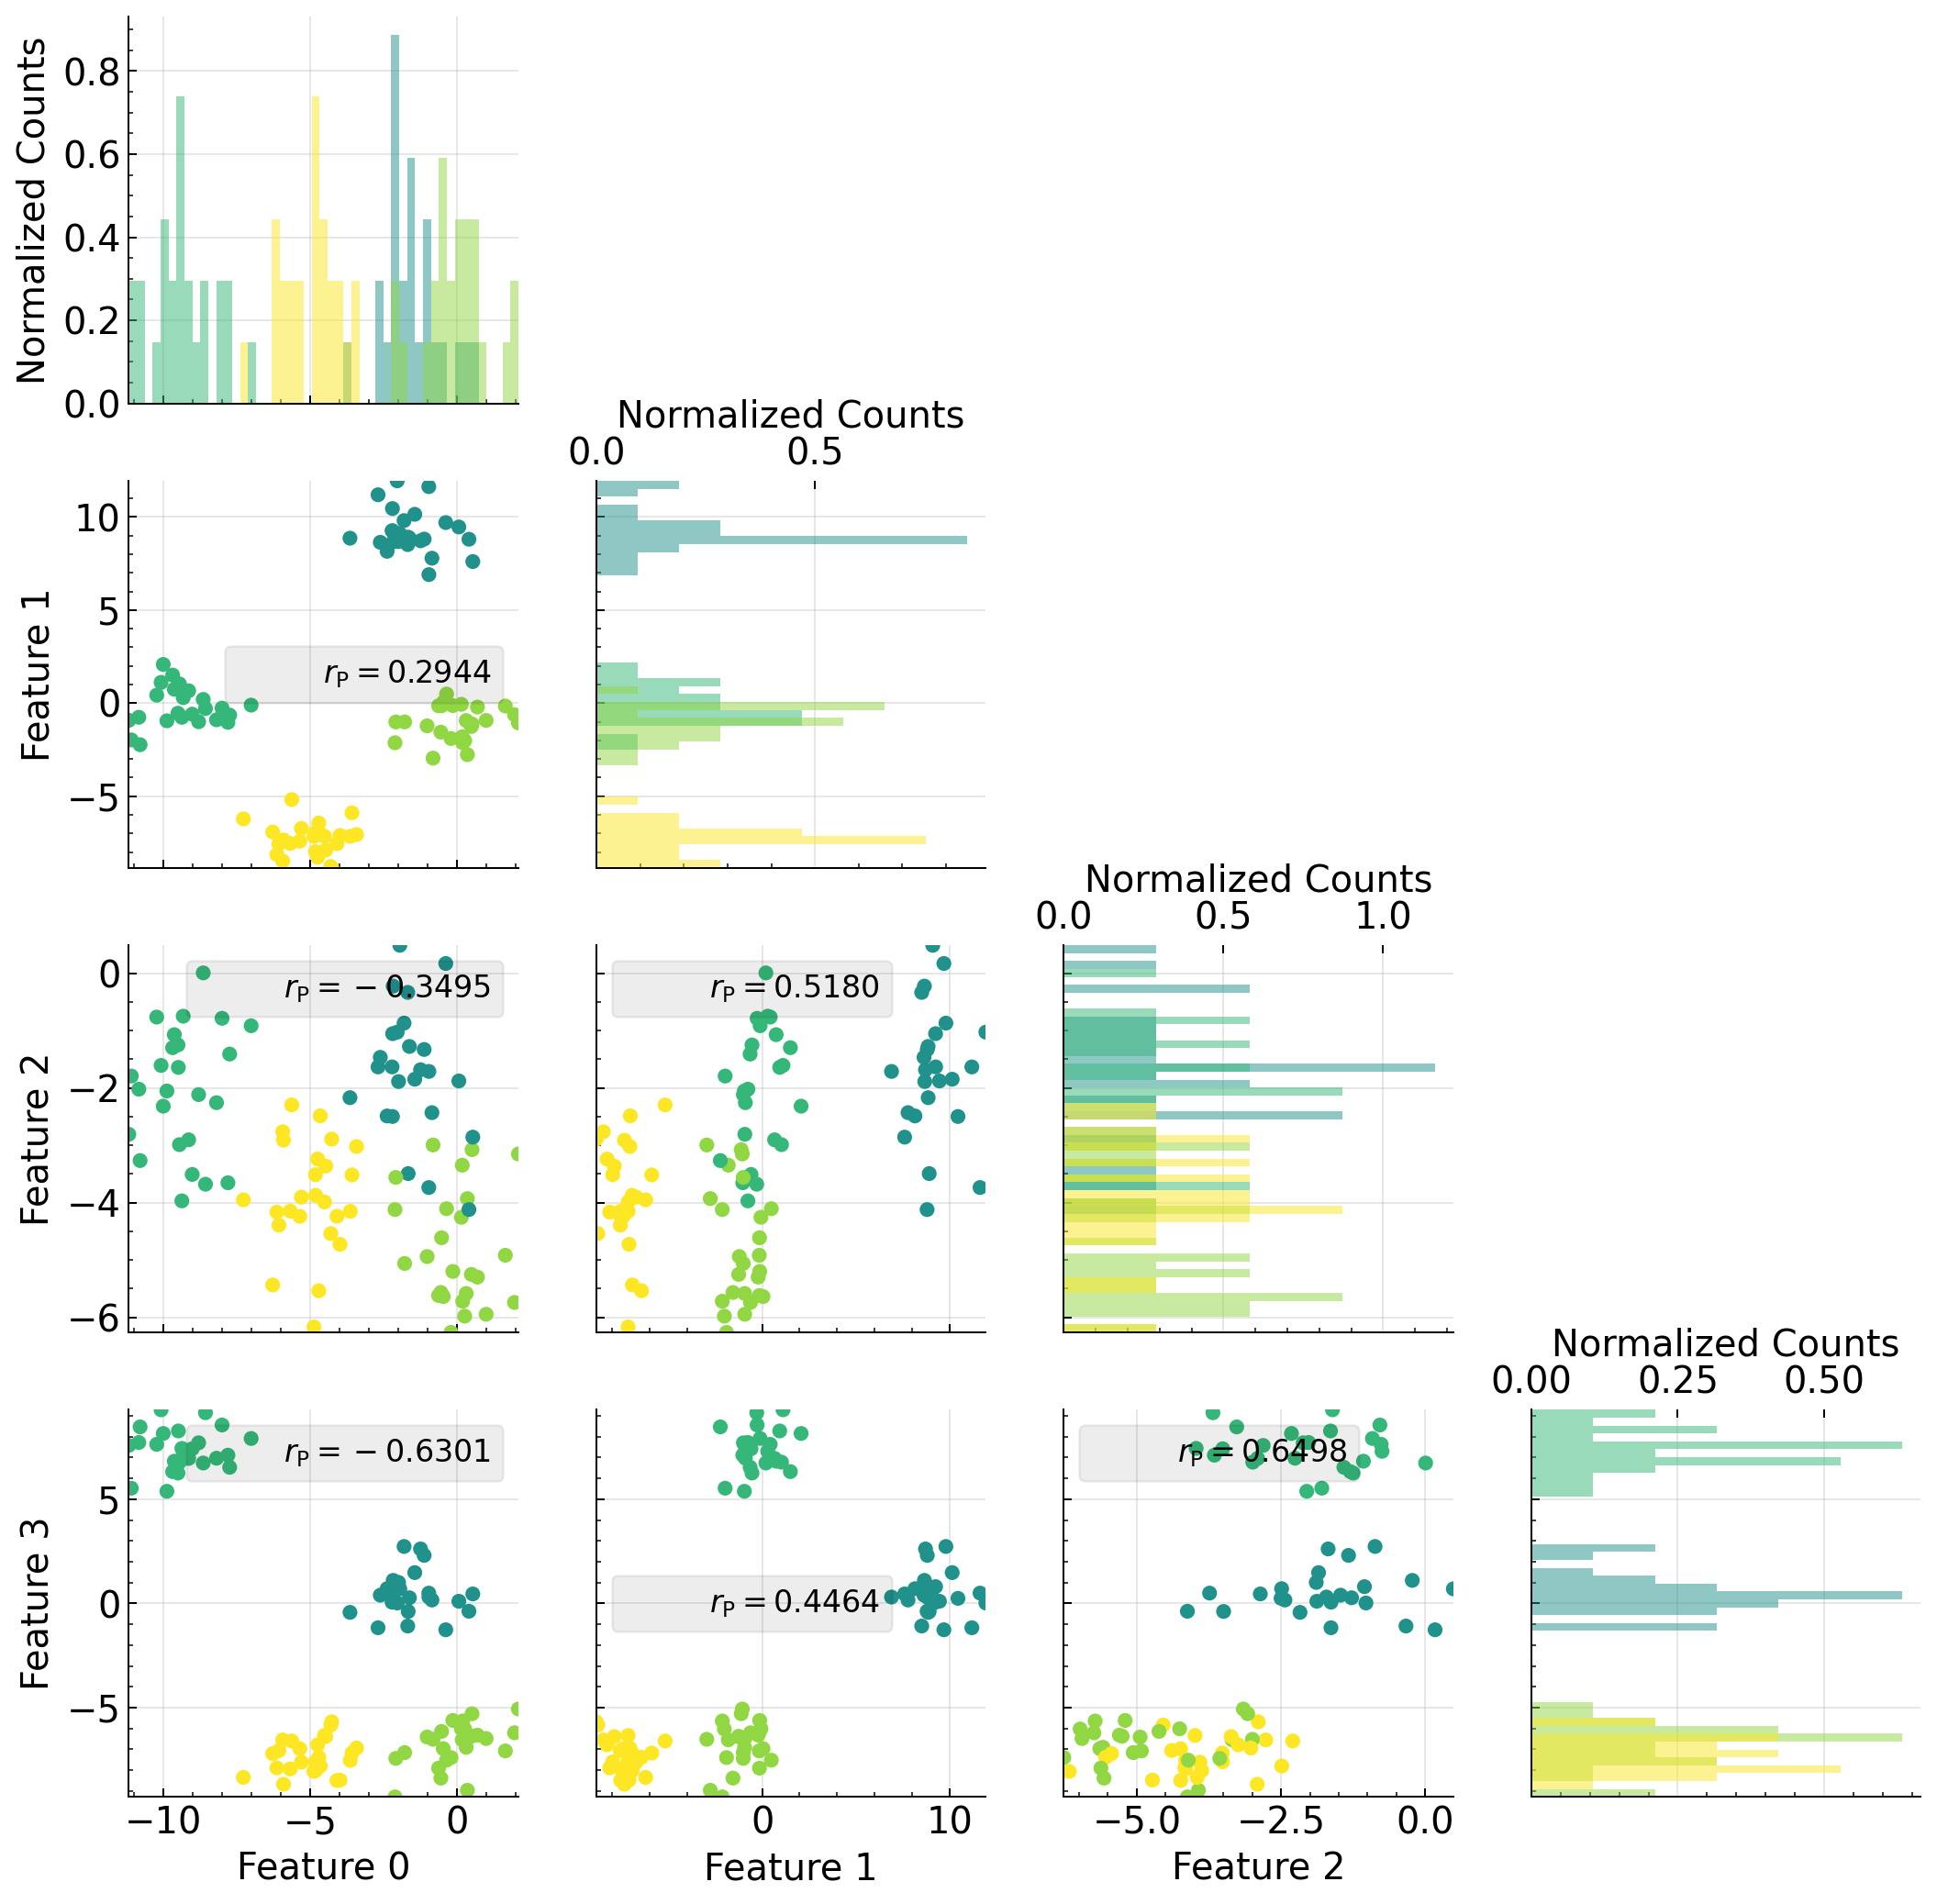

In [8]:
importlib.reload(alvipl)

mus = np.mean(X_latent, axis=0)
sigmas = np.std(X_latent, axis=0)

# X_latent = np.linspace((0,-1,-100), (10,1,100), 100)+np.random.randn(100,3)
# y_latent = np.round(np.sum(X_latent, axis=1))
# print(X_latent.shape)

CP = alvipl.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    # mus=mus, sigmas=sigmas, corrmat=None,
    bins=50,
    # bins=np.linspace(X_latent.min(),X_latent.max(),20),
    cmap="viridis",
    asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'s':30, 'alpha':1, 'vmin':-3},
    hist_kwargs={'density':True},
    plot_kwargs=None,
)



# LatentSpaceExplorer

Look at latent dimensions and generated samples (varying 2 latent variables)

-11.176803775731354 11.938949169510522


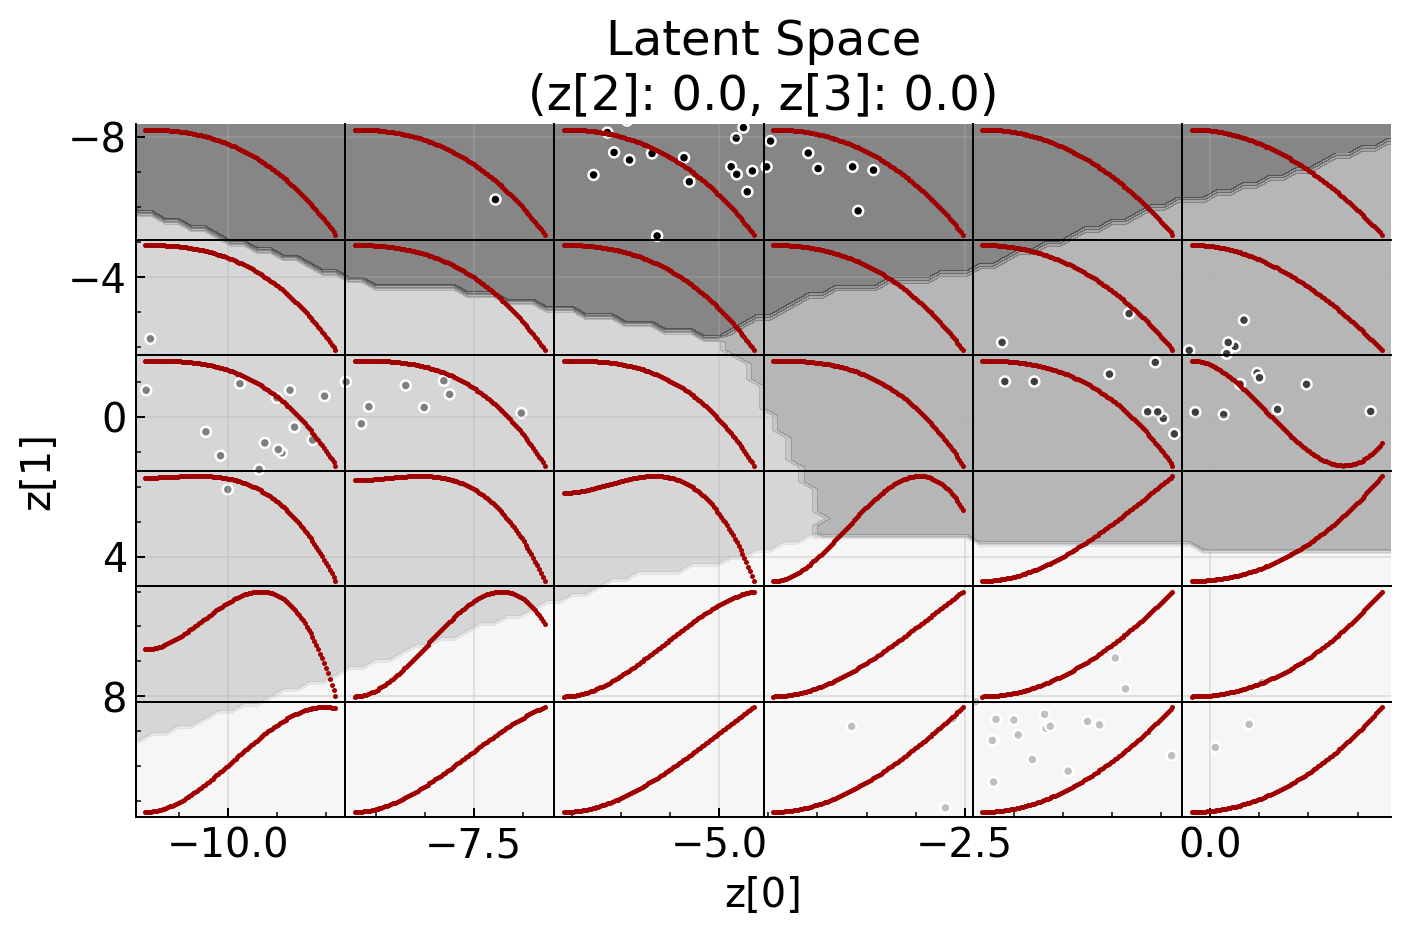

In [17]:
importlib.reload(alvipl)
def plot_func(
    ax:plt.Axes,
    X:np.ndarray,
    **kwargs,
    ) -> None:

    ax.scatter(np.linspace(0,1,X.shape[0]), X, s=1, **kwargs)


    return

LSE = alvipl.LatentSpaceExplorer(
    plot_func=None,
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

print(X_latent.min(), X_latent.max())

z0 = np.linspace(X_latent[:,0].min()+1.3,X_latent[:,0].max()-1.3,6)
z1 = np.linspace(X_latent[:,1].min()-2.0,X_latent[:,1].max()+2.0,6)[::-1]   #invert axis
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func=plot_func,
    subplots_kwargs=None, predict_kwargs=None,
    plot_func_kwargs=None,
    verbose=None,
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

#add scatter to background
axs[-1].scatter(*X_latent[:,:2].T, c=y, ec=plt.rcParams["axes.facecolor"], vmin=-1)

#invert axis
axs[-1].invert_yaxis()
plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

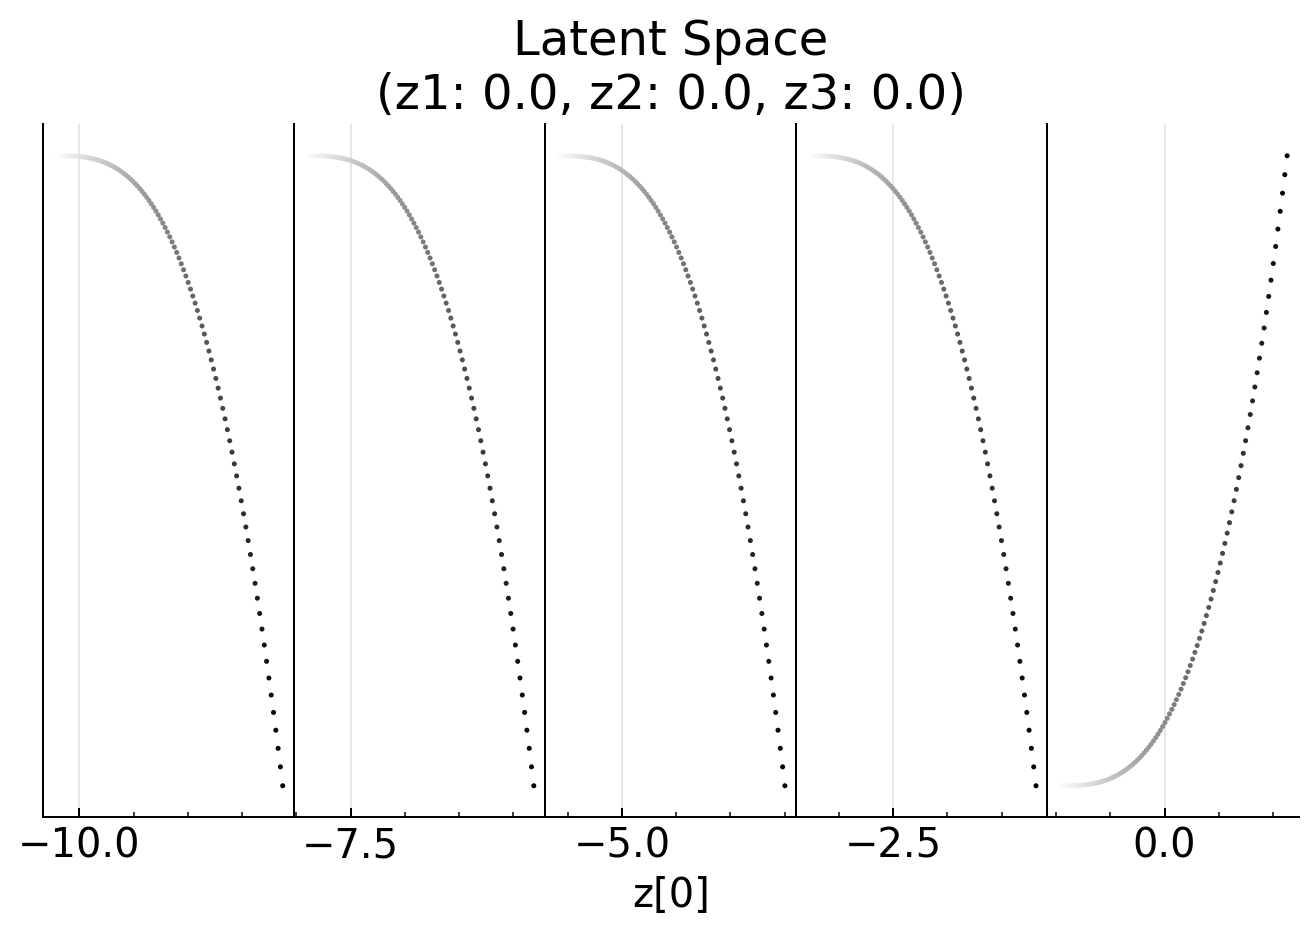

In [18]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func=plot_func,
    subplots_kwargs=None, predict_kwargs=None,
    plot_func_kwargs=dict(c=np.linspace(0,1,X_latent.shape[0])),
    verbose=None
)

# Multi Confusion-Matrix

Generate a dummy dataset

In [19]:
import copy

y_true = [
    np.array([0]*20+[1]*40+[2]*20),
    np.array([0]*60+[1]*20+[2]*30),
    np.array([0]*10+[1]*10+[2]*10),
]
y_pred = copy.deepcopy(y_true)


#add wrong classifications (confusion)
y_pred[0][0:3]      = 1
y_pred[0][3:10]     = 2
y_pred[0][20:30]    = 0
y_pred[0][30:32]    = 2
y_pred[0][60:65]    = 0
y_pred[0][65:70]    = 1
y_pred[1][0:30]     = 1
y_pred[1][30:35]    = 2
y_pred[1][60:62]    = 0
y_pred[1][62:78]    = 2
y_pred[1][80:81]    = 0
y_pred[1][81:83]    = 1
y_pred[2][0:1]      = 1
y_pred[2][1:1]      = 2
y_pred[2][10:20]    = 0
y_pred[2][20:20]    = 2
y_pred[2][20:25]    = 0
y_pred[2][25:29]    = 1

#add classes not present in y_true
y_pred[0][-3:] = 4


print(len(y_true))
print(y_true[0].shape, y_true[2].shape)

print([np.unique(yi) for yi in y_pred])
# #plot labels
# for yt, yp in zip(y_true, y_pred): plt.plot(yt-yp)


3
(80,) (30,)
[array([0, 1, 2, 4]), array([0, 1, 2]), array([0, 1, 2])]


Calculate Multi-Confusion-Matrix

In [20]:
importlib.reload(alvipl)

MCM = alvipl.MultiConfusionMatrix(
    score_decimals=2,
    text_colors=None,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs=None
)

multi_confmat = MCM.get_multi_confmat(
    y_true=y_true, y_pred=y_pred,
    sample_weight=None, normalize=None,
    verbose=0
)

Display Multi-Confusion-Matrix.
(Automatically determine how to display)

MultiConfusionMatrix(
    score_decimals=2,
    cmap='gray_r', vmin=-2, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs={'figsize': (9, 9)},
)


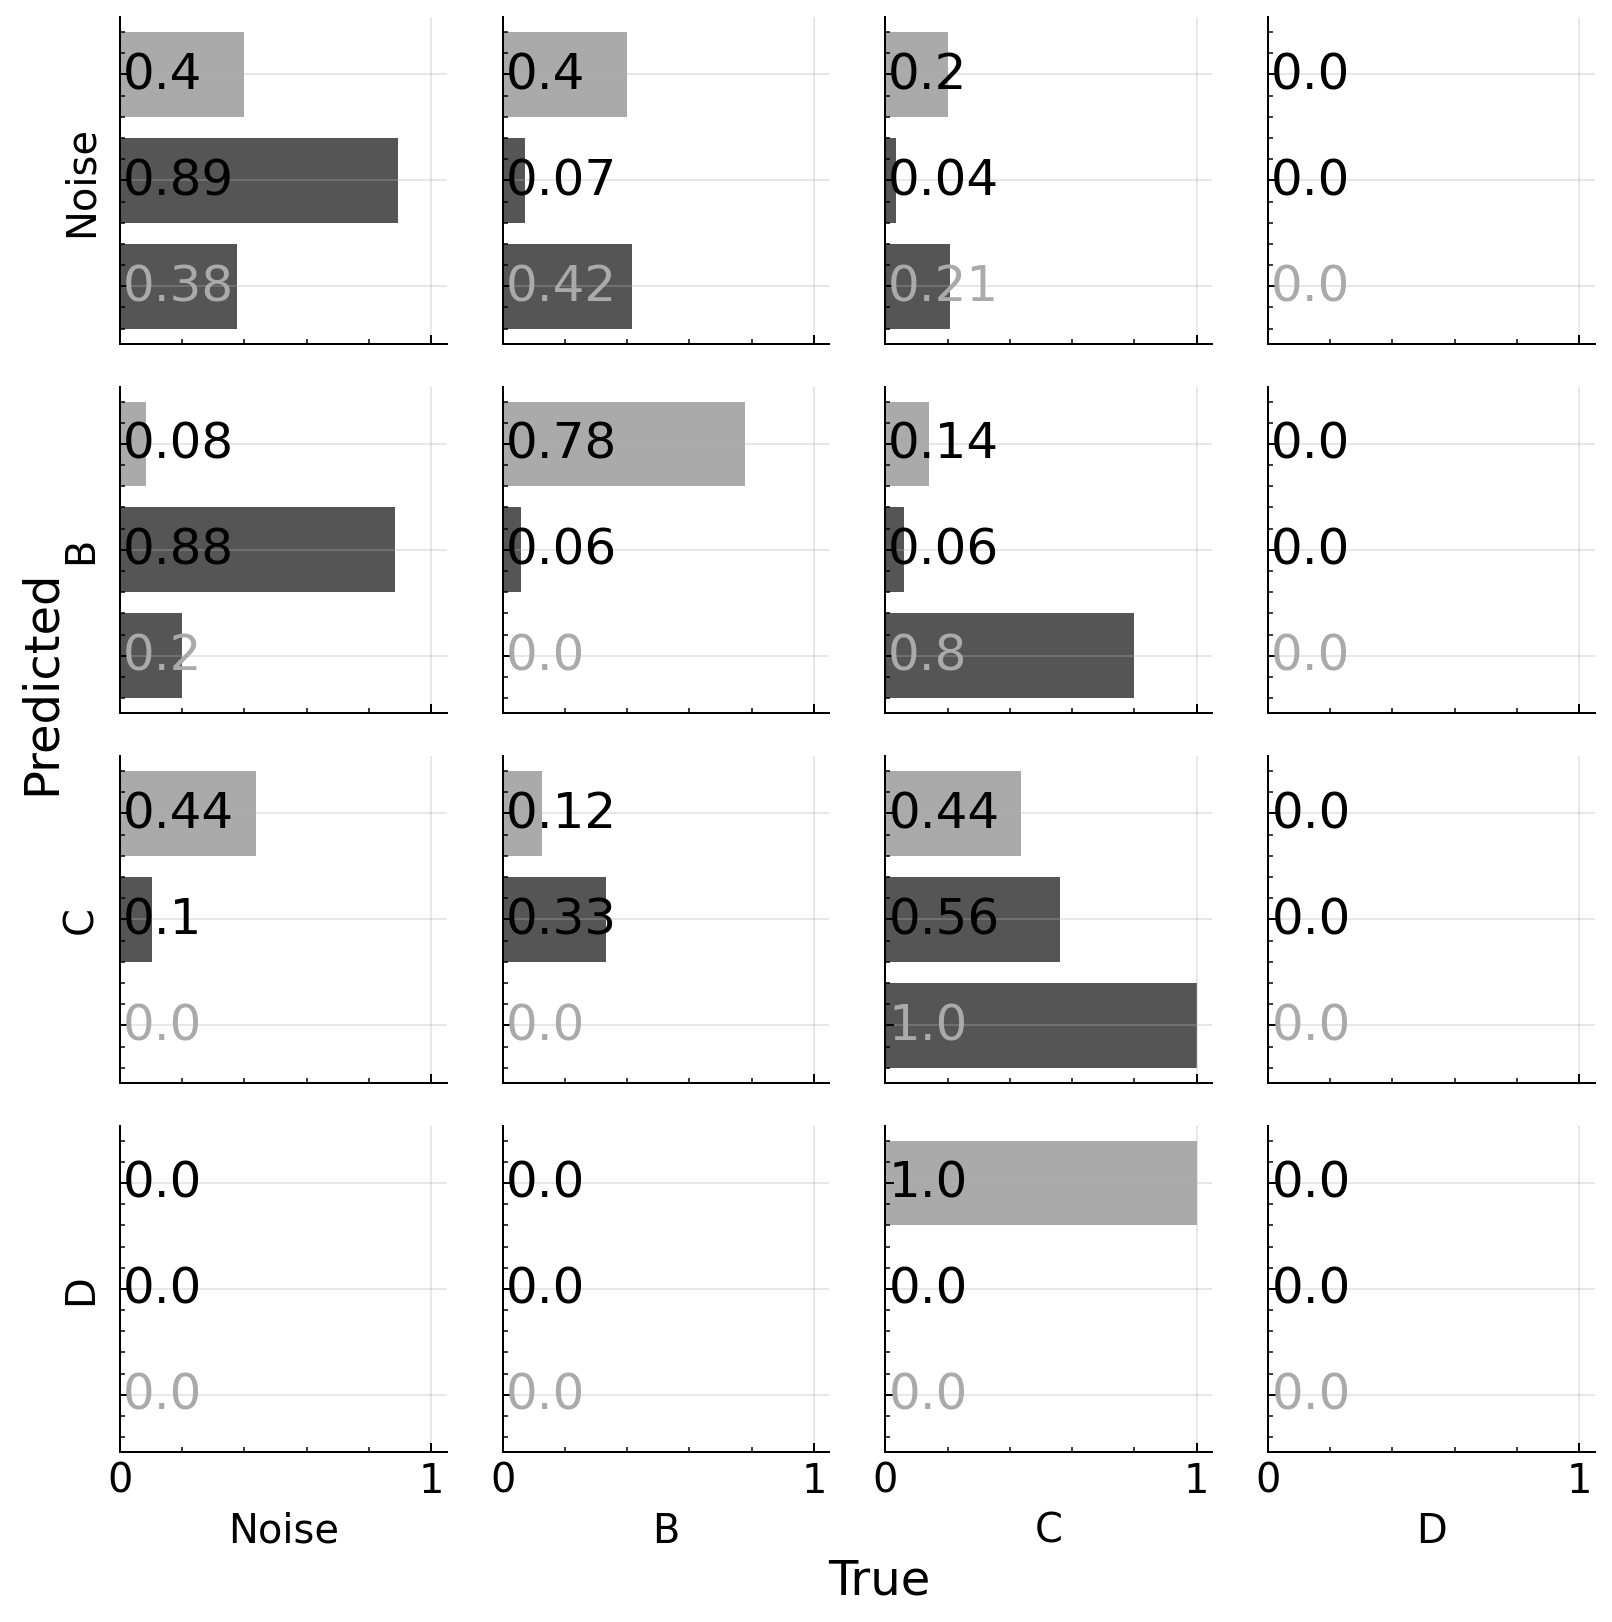

In [ ]:
importlib.reload(alvipl)


MCM = alvipl.MultiConfusionMatrix(
    score_decimals=2,
    text_colors=None,
    cmap=None, vmin=-2, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs=None
)
print(MCM)

fig, axs = MCM.plot_result(
    y_true, y_pred,
    labels=['Noise', 'B', 'C', 'D'],
    normalize='pred',
    plot_func='auto',
    plot_multimodel_kwargs=dict(
        # text_colors='g',
        m_labels='score',
        text_kwargs={'fontsize':20}
    ),
)


plt.show()

Force to plot single model

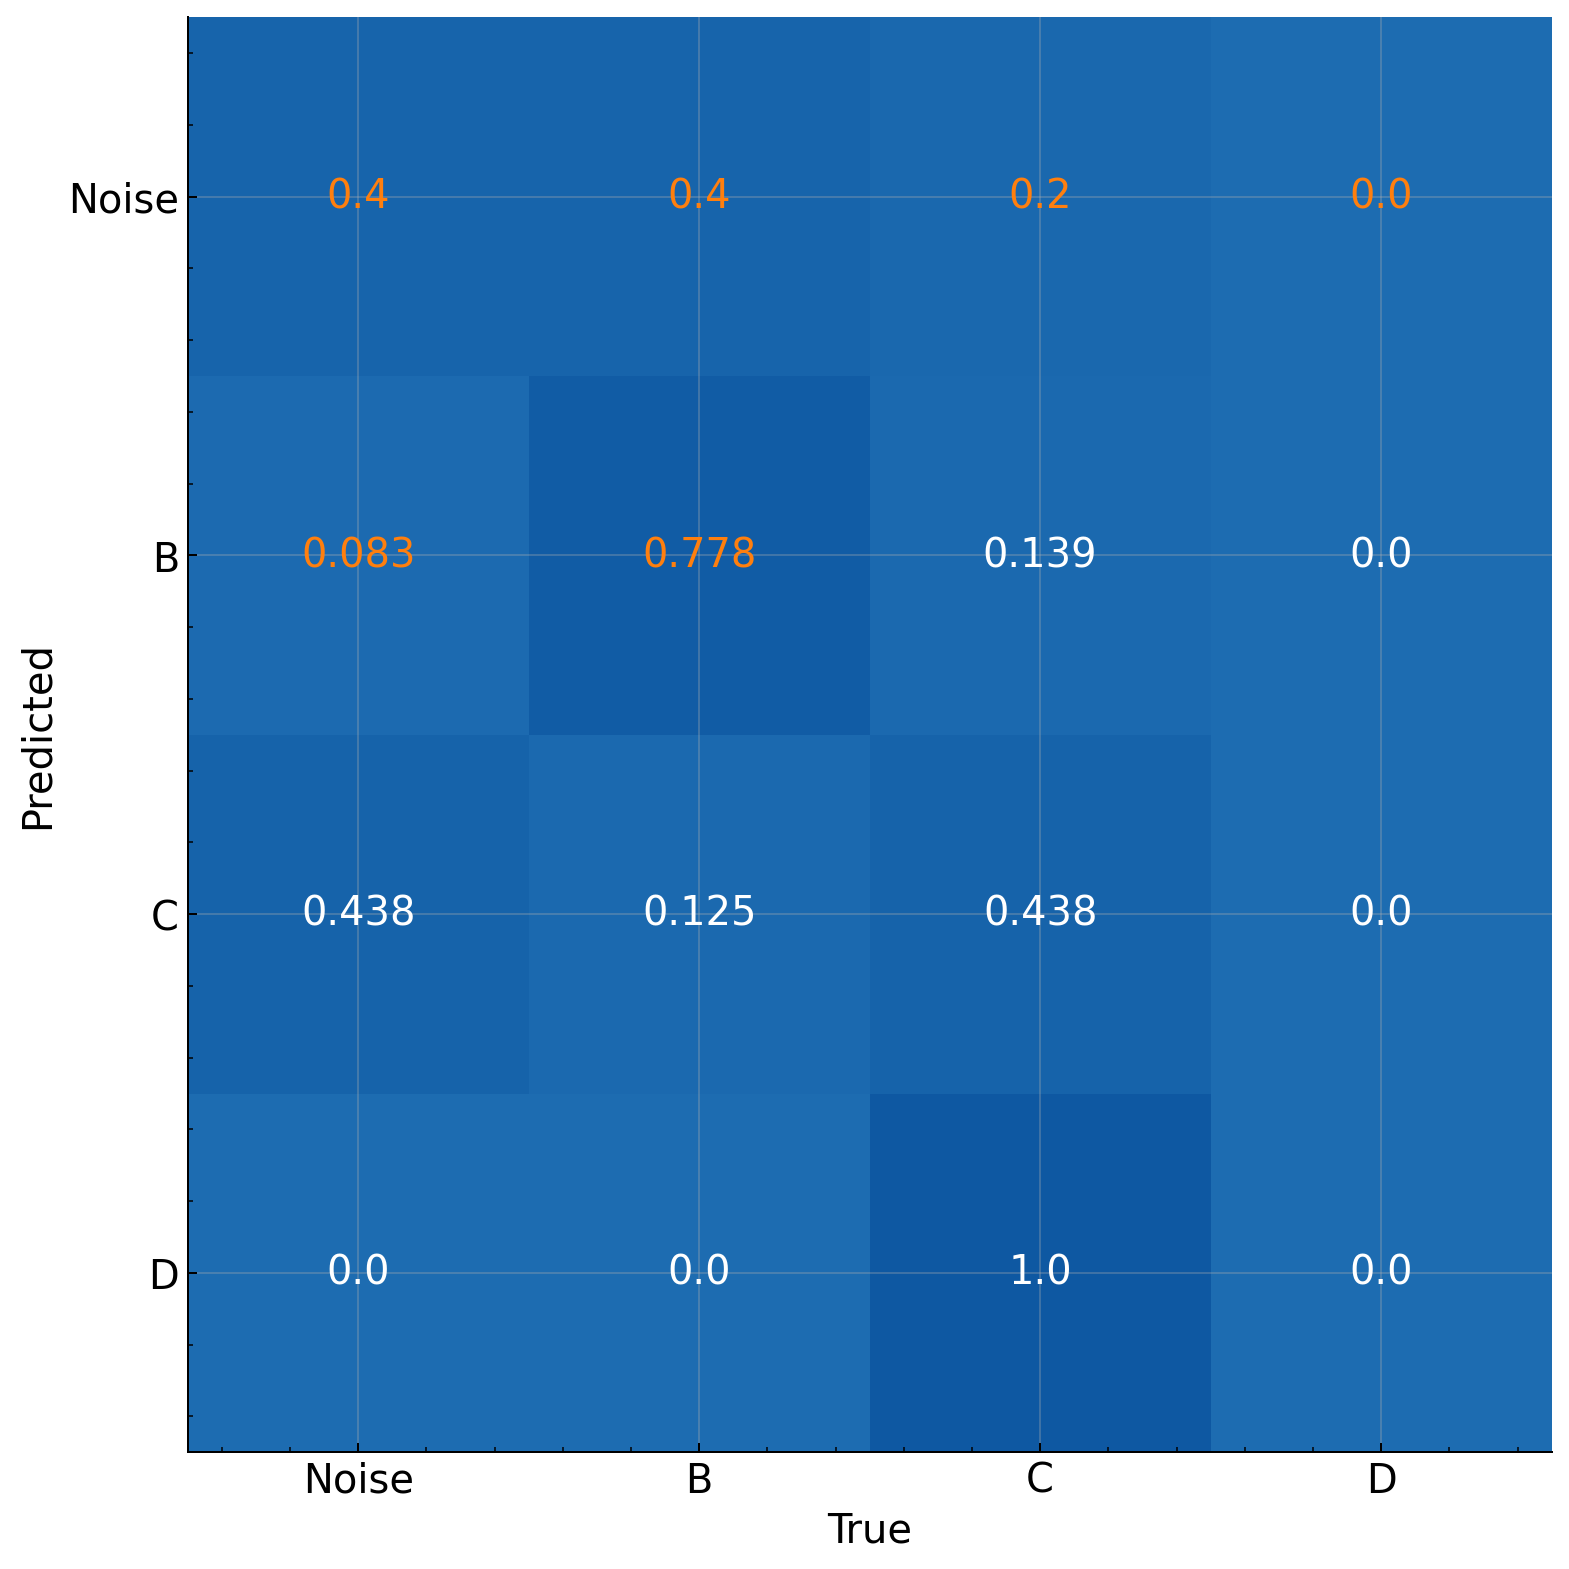

In [56]:
fig, axs = MCM.plot_result(
    y_true, y_pred,
    labels=['Noise', 'B', 'C', 'D', '?'],
    normalize='pred',
    plot_func='single',
    plot_singlemodel_kwargs=dict(
        score_decimals=3,
        text_colors=['tab:orange']*6+['w']*10,
        cmap='Blues', vmin=-10, vmax=3,
        pcolormesh_kwargs={'alpha':1.0},
    ),
)


plt.show()

# Multi-Head Attention Weigths in Transformers

MultiHeadAttentionWeights(
    style='matrix',
    cmap='gray_r', cmap_norm=None,
    verbose=0,
)


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


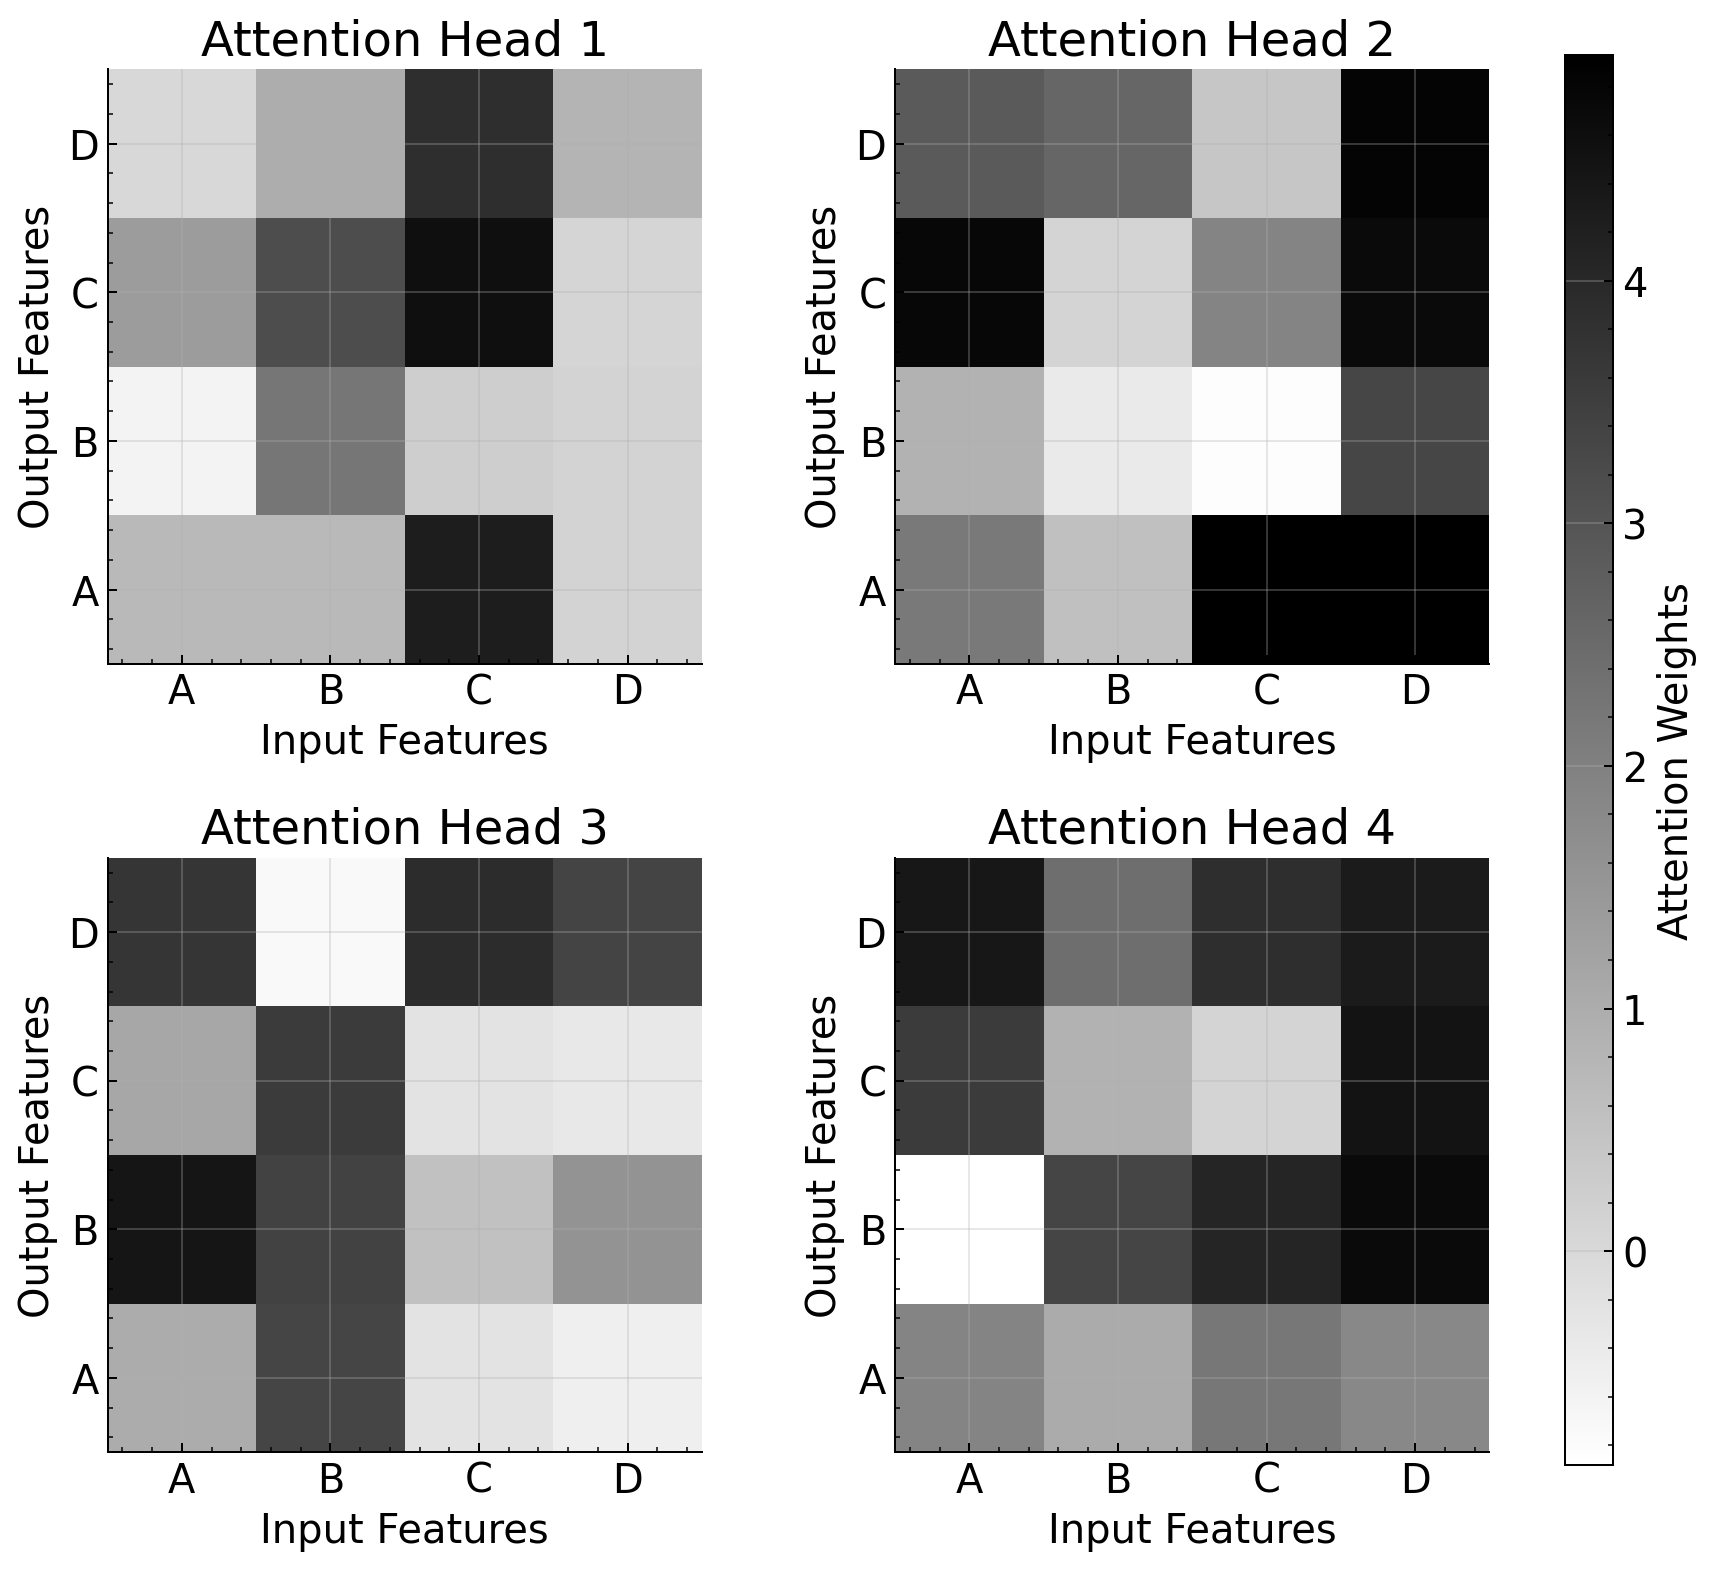

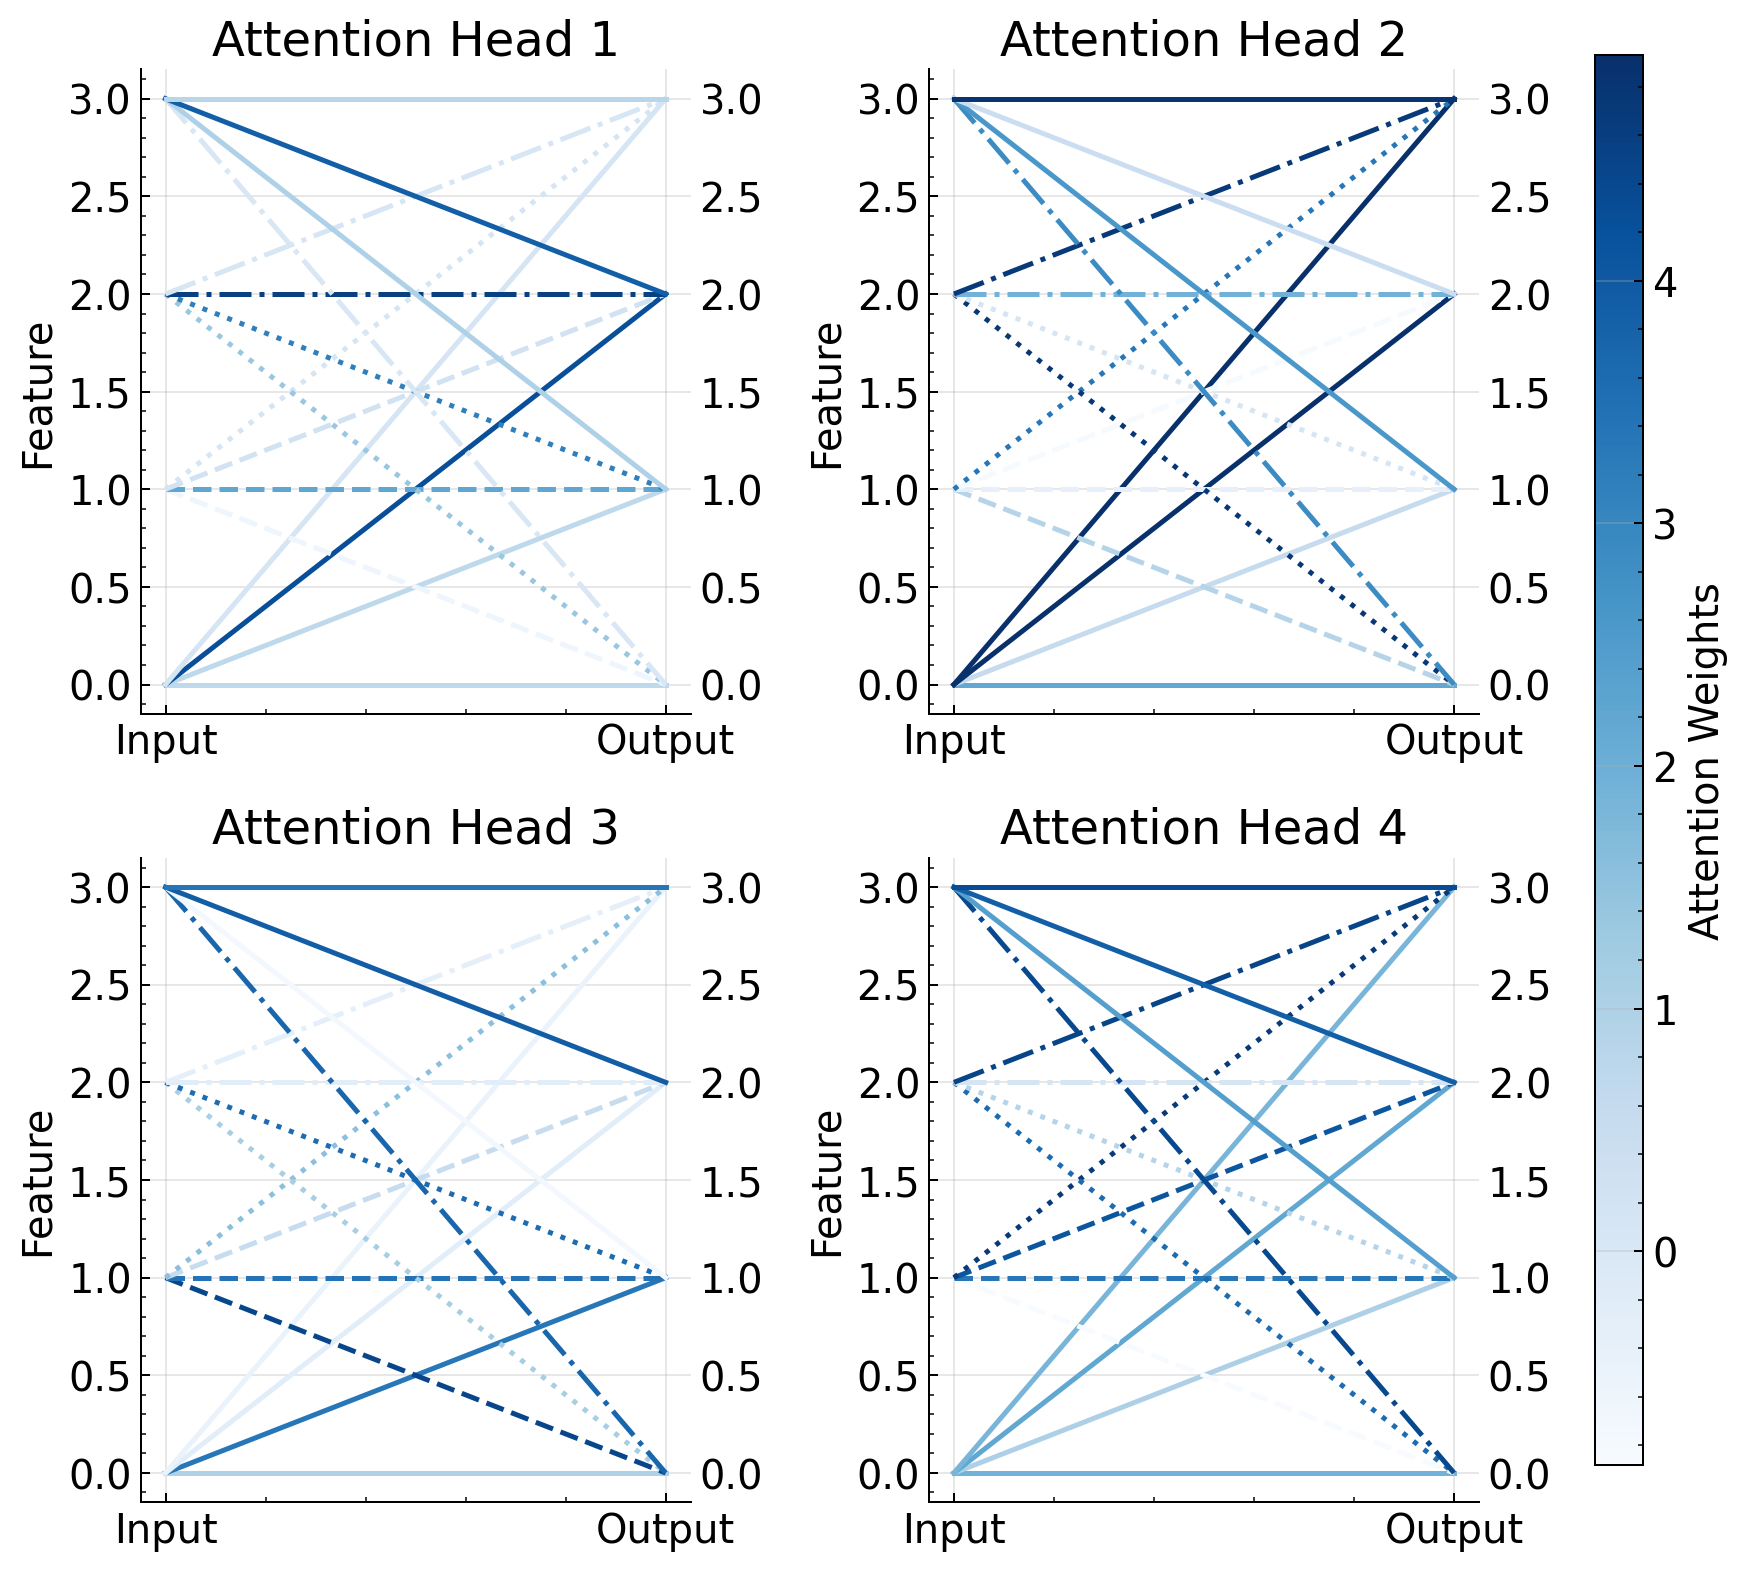

In [64]:
importlib.reload(alvipl)

#generate some random MHA weights
nheads  = 4
seq_len = 4
attention_weights = np.random.uniform(-1,5,size=(nheads,seq_len,seq_len))

MHAW = alvipl.MultiHeadAttentionWeights(
    style='matrix',
    cmap=None,
    cmap_norm=None,
    verbose=0
)
print(MHAW)


fig, axs = MHAW.plot(
    attention_weights=attention_weights,
    featurenames=['A', 'B', 'C', 'D'],
    style=None,
    cmap=None,
    cmap_norm=None,
    fig=None,
    plot_attention_matrix_kwargs=dict(),
    plot_attention_lines_kwargs=dict(),
)
fig, axs = MHAW.plot(
    attention_weights=attention_weights,
    featurenames=None,
    style='lines',
    cmap="Blues",
    cmap_norm=None,
    fig=None,
    plot_attention_matrix_kwargs=dict(),
    plot_attention_lines_kwargs=dict(),
)


plt.show()

# Parallel Coordinate Plot

Generate a dummy dataset

In [65]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 10000, (nsamples,1), dtype=int)
x3 = np.random.choice(['a', 'relu', 'sigmoid', 'tanh', np.nan], size=(nsamples,1))
x4 = np.random.randint(-2, 8, (nsamples,1), dtype=int).astype(float)
score = np.random.uniform(0, 100, (nsamples,1))
score[:2]   = np.nan
score[2:3]  = np.inf
score[3:4]  = -np.inf
score[5:7]  = 0
score[7:10] = -1
x4[8]       = np.nan
# score = np.random.uniform(0.3, 0.8, (nsamples,1))
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'x4':x4.flatten(),
    'score':score.flatten(),
    # 'acc':score.flatten(),
}

df = pl.DataFrame(data=X)
print(df)

usecols = ['x1', 'x2', 'x3', 'x4', 'score']
X = df.select(pl.col(usecols)).to_numpy()



shape: (100, 6)
┌─────┬──────────┬──────┬─────────┬─────┬───────────┐
│ #   ┆ x1       ┆ x2   ┆ x3      ┆ x4  ┆ score     │
│ --- ┆ ---      ┆ ---  ┆ ---     ┆ --- ┆ ---       │
│ str ┆ f64      ┆ i64  ┆ str     ┆ f64 ┆ f64       │
╞═════╪══════════╪══════╪═════════╪═════╪═══════════╡
│ A   ┆ 0.817219 ┆ 1909 ┆ tanh    ┆ 2.0 ┆ NaN       │
│ B   ┆ 0.214767 ┆ 9221 ┆ relu    ┆ 5.0 ┆ NaN       │
│ C   ┆ 0.564466 ┆ 1519 ┆ sigmoid ┆ 4.0 ┆ inf       │
│ B   ┆ 0.795156 ┆ 6656 ┆ tanh    ┆ 4.0 ┆ -inf      │
│ A   ┆ 0.051377 ┆ 5681 ┆ a       ┆ 3.0 ┆ 4.041497  │
│ …   ┆ …        ┆ …    ┆ …       ┆ …   ┆ …         │
│ B   ┆ 0.527906 ┆ 7902 ┆ tanh    ┆ 2.0 ┆ 92.278111 │
│ B   ┆ 0.84442  ┆ 2000 ┆ tanh    ┆ 5.0 ┆ 90.864648 │
│ D   ┆ 0.155116 ┆ 6997 ┆ a       ┆ 7.0 ┆ 40.488936 │
│ C   ┆ 0.652663 ┆ 1254 ┆ tanh    ┆ 3.0 ┆ 9.651275  │
│ D   ┆ 0.948717 ┆ 6752 ┆ relu    ┆ 6.0 ┆ 87.139166 │
└─────┴──────────┴──────┴─────────┴─────┴───────────┘


Let's look at the different features/coordinates

ParallelCoordinates(
    nancolor='tab:grey', nanfrac=0.015625,
    base_cmap='gray_r', vmin=0, vmin=1,
    sleep=0.0,
    verbose=3,
)


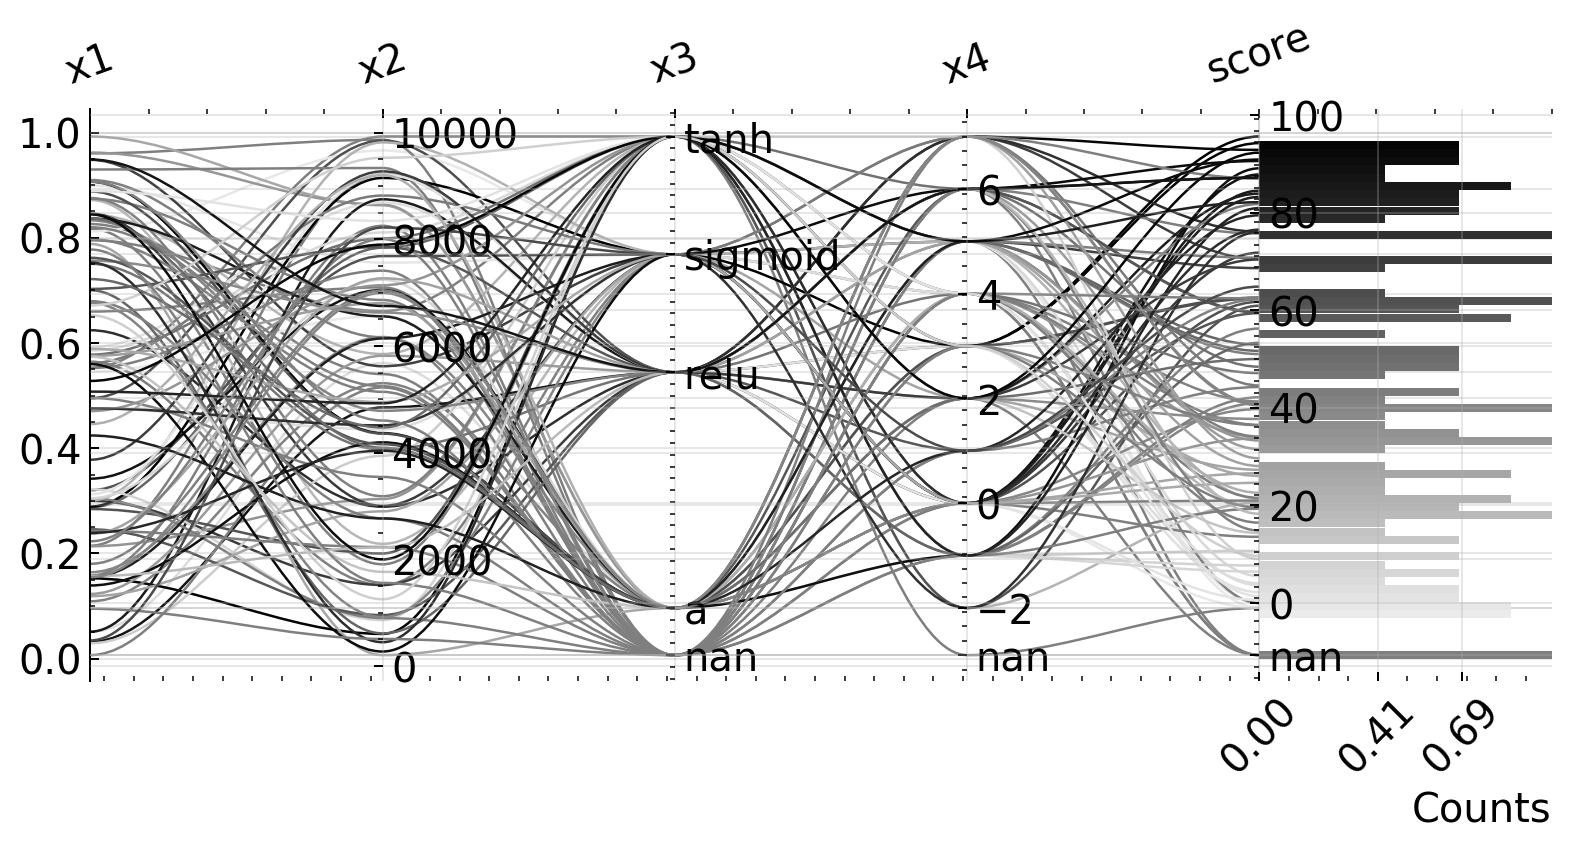

In [68]:
importlib.reload(alvipl)


PC = alvipl.ParallelCoordinates(
    nancolor='tab:grey', nanfrac=4/256,
    base_cmap=None, vmin=0, vmax=1,
    y_margin=0.05,
    xscale_dist='symlog',
    sleep=0.0,
    verbose=3,
)

print(PC)

fig, axs = PC.plot(
    X,
    coordnames=usecols,
    nancolor=None,
    nanfrac=4/256,
    base_cmap=None,
    vmin=None, vmax=None,
    y_margin=None,
    xscale_dist=None,
    ax=None,
    sleep=None,
    verbose=None,
    set_xticklabels_kwargs=dict(color='k', rotation=20),
    pathpatch_kwargs=None,
    set_xticklabels_dist_kwargs=dict(rotation=45),
)

fig.tight_layout()

plt.show()

Plotting right into an existing axis

WARNING(plot): `len(coordnames)` has to be the same as `X.shape[1]`. Adding autogenerated labels to ensure correct length!


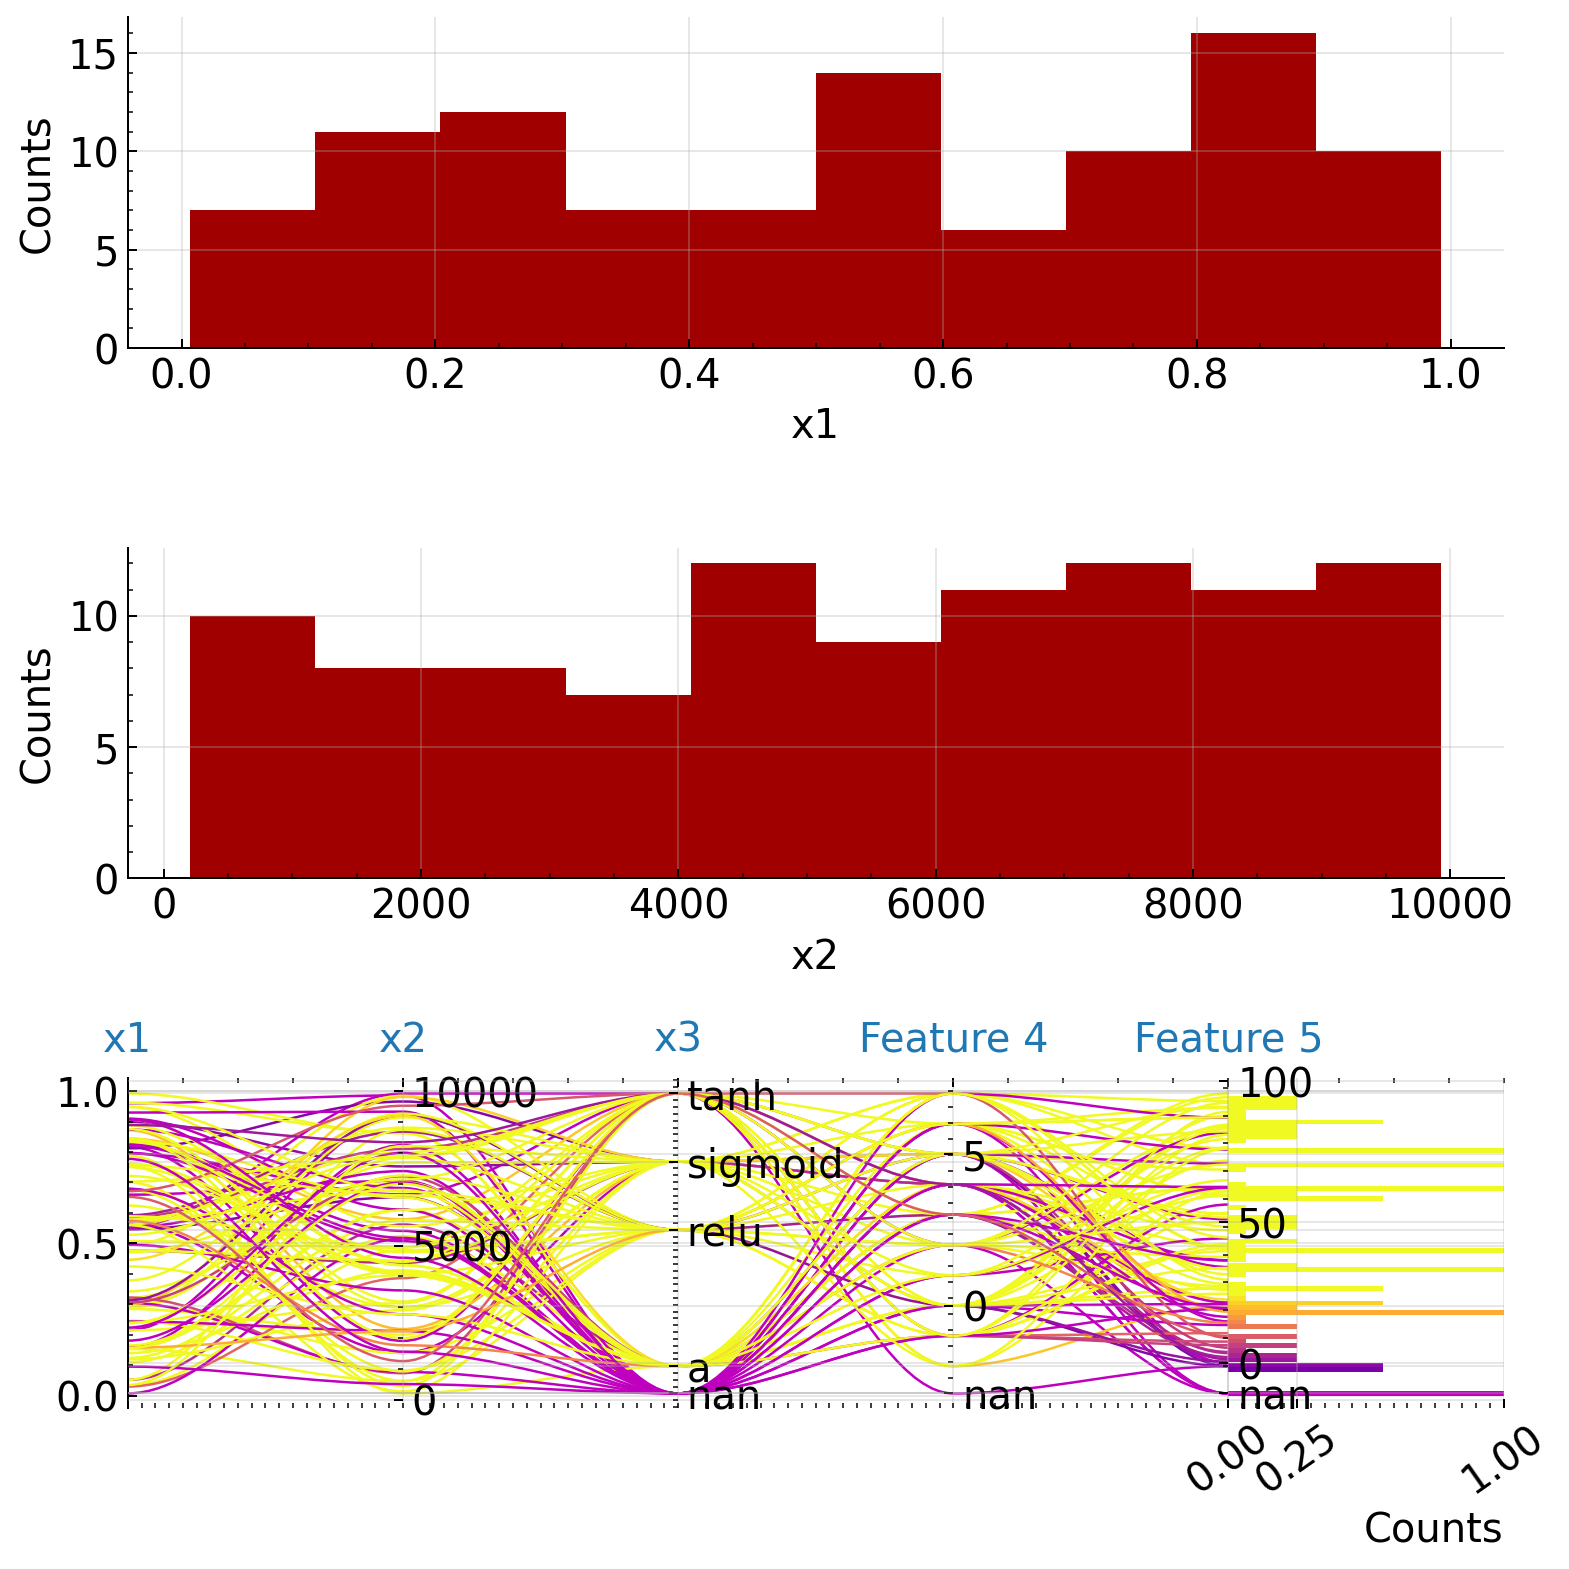

In [70]:

#init figure and axes
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

#plot histograms of frist two features
ax1.hist(X[:,0])
ax2.hist(X[:,1])
ax1.set_xlabel(usecols[0])
ax2.set_xlabel(usecols[1])
ax1.set_ylabel('Counts')
ax2.set_ylabel('Counts')


#add parallel coordinates plot in third subplot
fig, axs = PC.plot(
    X,
    coordnames=usecols[:-2],    #some coordinate names missing
    nancolor='m',
    nanfrac=4/256,
    base_cmap='plasma',
    vmin=0,
    vmax=3,                     #distribute cmap differently
    y_margin=0.05,
    xscale_dist=lambda x: x**2, #custom scaling
    ax=ax3,                     #ax to plot into
    sleep=None,
    verbose=None,
    set_xticklabels_kwargs=dict(color='tab:blue', rotation=0),
    pathpatch_kwargs=None,
    set_xticklabels_dist_kwargs=dict(rotation=35),
)

fig.tight_layout()

plt.show()

# Venn Diagram

Visualization of a the following query

\begin{align}
    k_1 \lor (k_2 \land \neg  k_3) \lor (k_4\land k_3)
\end{align}

VennDiagram(
    verbose=2,
)
INFO(VennDiagram.plot): Parsed `query`: (query_array[:,:,3]*query_array[:,:,4])+(query_array[:,:,3]*query_array[:,:,5])+(query_array[:,:,3]*(1-query_array[:,:,6]))


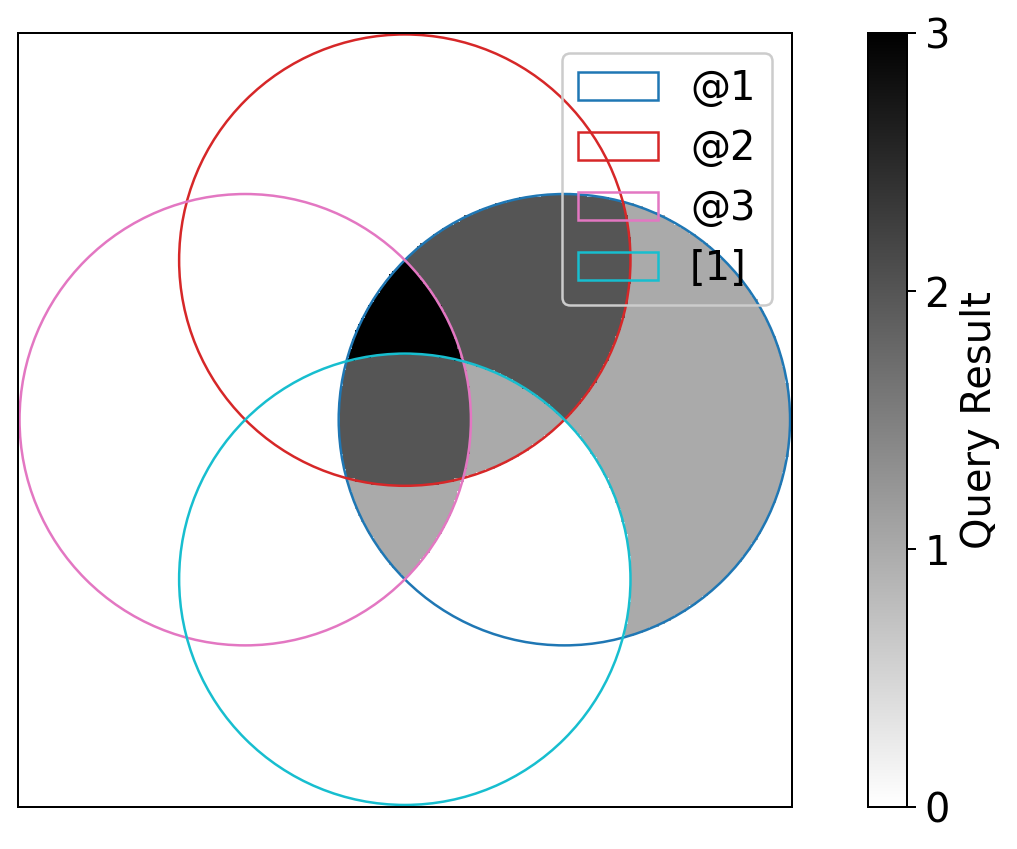

In [14]:
importlib.reload(alvipl)

VD = alvipl.VennDiagram(verbose=2)

print(VD)

# fig, axs = VD.plot(
#     query='@1|(@2&(~@3))|(@4&@3)',
#     labels=['@1', '@2', '@3'],
#     # pcolormesh_kwargs={'vmax':1}
#     # pcolormesh_kwargs={'vmin':1}
# )
fig, axs = VD.plot(
    query='(@1&@2)|(@1&@3)|(@1&(~@4))',
    labels=['@1', '@2', '@3'],
    # pcolormesh_kwargs={'vmax':1}
    # pcolormesh_kwargs={'vmin':1}
)

plt.show()

# Confusion Matrix

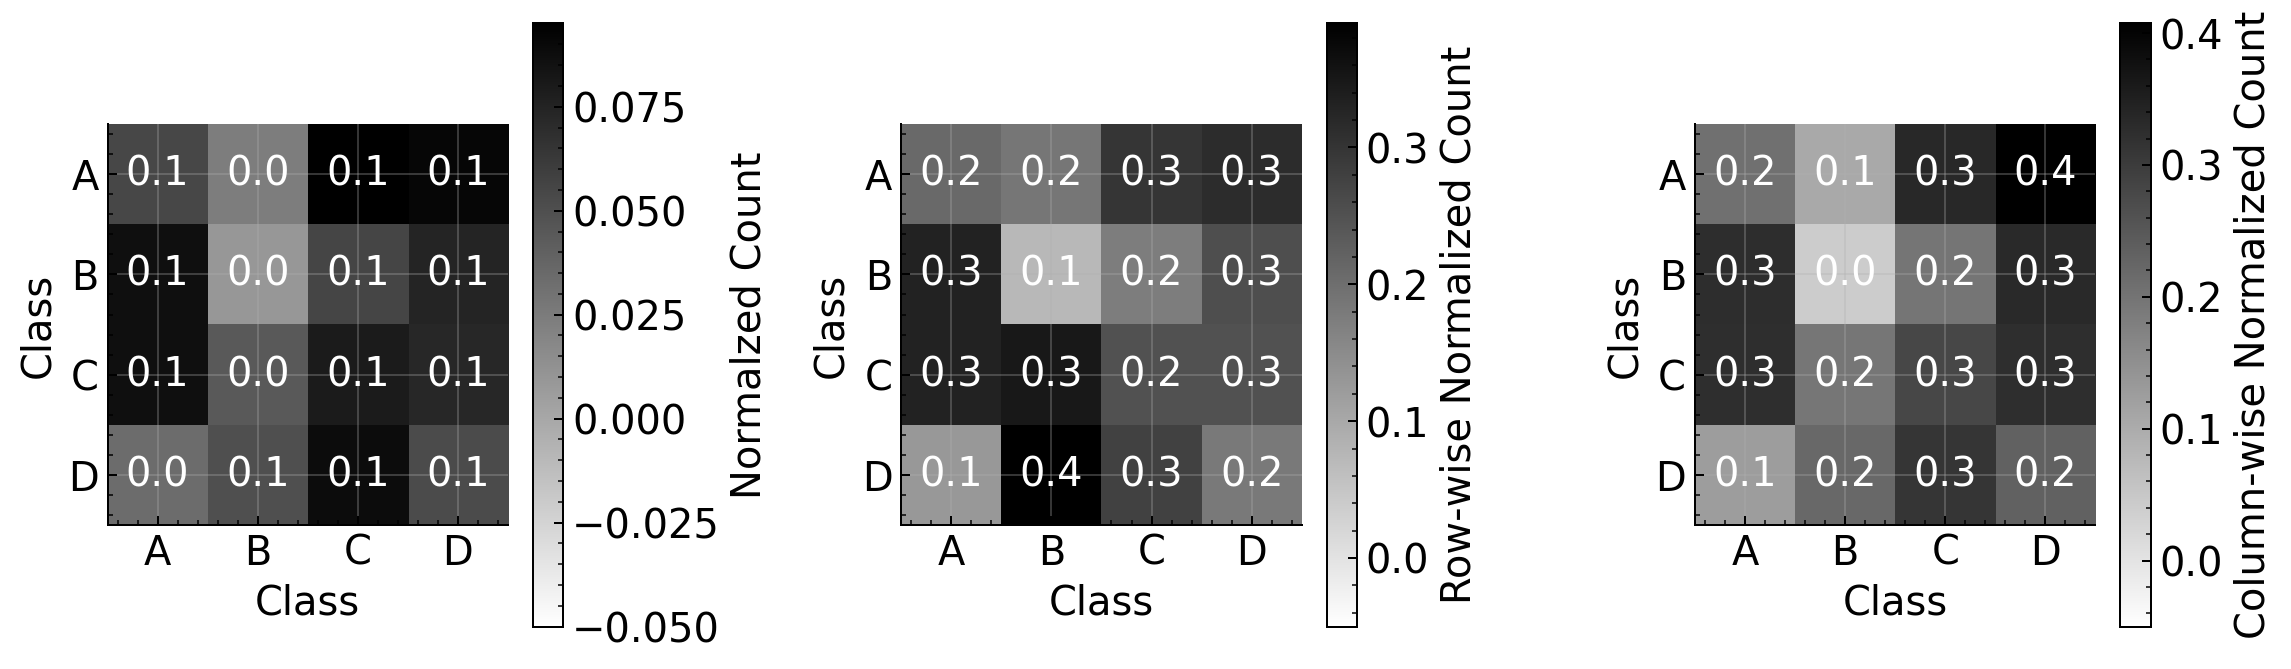

In [90]:
importlib.reload(alvipl)
X = np.random.rand(4,4)
X /= X.sum()
y = ["A", "B", "C", "D"]

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

imshow_kwargs = dict(vmin=-.05)

_, _ = alvipl.plot_confusion_matrix(
    X /X.sum(), y,
    xlab="Class", ylab="Class",
    cbarlabel="Normalzed Count",
    annotate=True,
    annotationcolor="w",
    textfontsize=None,
    ax=ax1,
    fontsize=16,
    imshow_kwargs=imshow_kwargs,
)
_, _ = alvipl.plot_confusion_matrix(
    X/X.sum(axis=0), y,
    cbarlabel="Row-wise Normalized Count",
    ax=ax2,
    imshow_kwargs=imshow_kwargs,
)
fig, axs = alvipl.plot_confusion_matrix(
    X/X.sum(axis=1), y,
    cbarlabel="Column-wise Normalized Count",
    ax=ax3,
    imshow_kwargs=imshow_kwargs,
)

# Prediction VS Truth

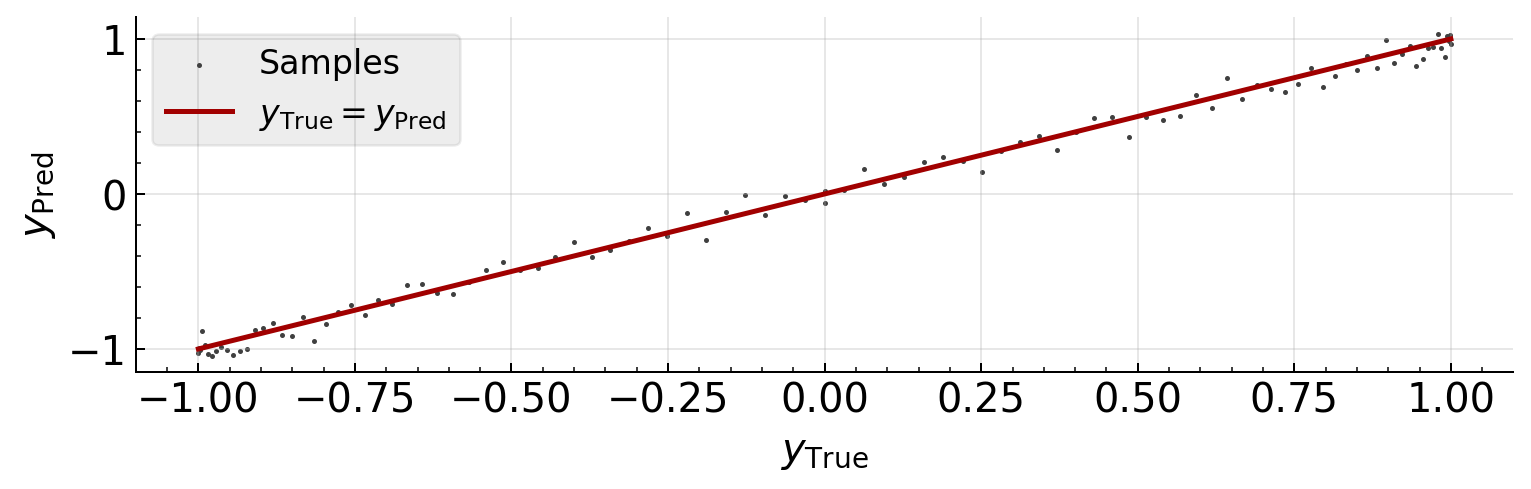

In [92]:
importlib.reload(alvipl)

nsamples = 100
y = np.sin(np.linspace(0,2*np.pi,nsamples))
y_pred = y + 0.05 * np.random.randn(nsamples)

fig, axs = alvipl.plot_predictioneval(y, y_pred, fig_kwargs=dict(figsize=(9,3)))
plt.show()